# Time Series Analysis

# Displaying the first few rows to understand the structure of the dataset

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Loading the dataset
file_path = 'Assignment_3.xlsx'
df = pd.read_csv("C:\\Users\\91957\\AppData\\Roaming\\Python\\Python312\\Scripts\\Python Assignments\\Assignment_3.csv")

# Displaying the first few rows to understand the structure
df.head(10)

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236
5,6,Friday,6,9/19/2014,"2,815","1,863","1,622",241
6,7,Saturday,7,9/20/2014,"1,658","1,118",985,133
7,8,Sunday,1,9/21/2014,"2,288","1,656","1,481",175
8,9,Monday,2,9/22/2014,"3,638","2,586","2,312",274
9,10,Tuesday,3,9/23/2014,"4,462","3,257","2,989",268


# Checking for any missing values in the dataset

In [2]:
# Checking for empty values in the entire dataset
empty_values = df.isnull()

# Summarizing the number of missing values in each column
missing_summary = df.isnull().sum()

print("Missing values in each column:")
print(missing_summary)
missing_in_index = df.index.isnull().sum()
print(f"Number of missing values in the index: {missing_in_index}")

Missing values in each column:
Row                  0
Day                  0
Day.Of.Week          0
Date                 0
Page.Loads           0
Unique.Visits        0
First.Time.Visits    0
Returning.Visits     0
dtype: int64
Number of missing values in the index: 0


# Checking the data type of each column

In [3]:
print (df.dtypes)

Row                   int64
Day                  object
Day.Of.Week           int64
Date                 object
Page.Loads           object
Unique.Visits        object
First.Time.Visits    object
Returning.Visits     object
dtype: object


# If the columns in the dataset are not already strings, converting them to strings

In [4]:
# If the columns are not already strings, converting them to strings
df['Page.Loads'] = df['Page.Loads'].astype(str)
df['Unique.Visits'] = df['Unique.Visits'].astype(str)
df['First.Time.Visits'] = df['First.Time.Visits'].astype(str)
df['Returning.Visits'] = df['Returning.Visits'].astype(str)
print (df.dtypes)

Row                   int64
Day                  object
Day.Of.Week           int64
Date                 object
Page.Loads           object
Unique.Visits        object
First.Time.Visits    object
Returning.Visits     object
dtype: object


# Proceeding with removing commas and converting  strings into integers 

In [5]:
# Proceeding with removing commas and converting to integers
df['Page.Loads'] = df['Page.Loads'].str.replace(',', '').astype(int)
df['Unique.Visits'] = df['Unique.Visits'].str.replace(',', '').astype(int)
df['First.Time.Visits'] = df['First.Time.Visits'].str.replace(',', '').astype(int)
df['Returning.Visits'] = df['Returning.Visits'].str.replace(',', '').astype(int)

# Checking the data types again to confirm the changes
print(df.dtypes)

# Displaying the first few rows of the cleaned dataset
print(df.head())

Row                   int64
Day                  object
Day.Of.Week           int64
Date                 object
Page.Loads            int64
Unique.Visits         int64
First.Time.Visits     int64
Returning.Visits      int64
dtype: object
   Row        Day  Day.Of.Week       Date  Page.Loads  Unique.Visits  \
0    1     Sunday            1  9/14/2014        2146           1582   
1    2     Monday            2  9/15/2014        3621           2528   
2    3    Tuesday            3  9/16/2014        3698           2630   
3    4  Wednesday            4  9/17/2014        3667           2614   
4    5   Thursday            5  9/18/2014        3316           2366   

   First.Time.Visits  Returning.Visits  
0               1430               152  
1               2297               231  
2               2352               278  
3               2327               287  
4               2130               236  


# Converting the date column into datetime format and setting it as index for our analysis

In [6]:
import pandas as pd
from dateutil import parser

# Function to parse mixed date formats
def parse_mixed_dates(date):
    try:
        # Attempt to parse using the default format (MM/DD/YYYY)
        return parser.parse(date, dayfirst=False, fuzzy=True)
    except ValueError:
        # If parsing fails, try the day-first format (DD/MM/YYYY)
        return parser.parse(date, dayfirst=True, fuzzy=True)

# Applying the function to parse the 'Date' column
df['Date'] = df['Date'].apply(parse_mixed_dates)

# Converting the parsed 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Setting the 'Date' column as the index for time series analysis
df.set_index('Date', inplace=True)

# Displaying the first few rows to confirm the changes
print(df.head())

            Row        Day  Day.Of.Week  Page.Loads  Unique.Visits  \
Date                                                                 
2014-09-14    1     Sunday            1        2146           1582   
2014-09-15    2     Monday            2        3621           2528   
2014-09-16    3    Tuesday            3        3698           2630   
2014-09-17    4  Wednesday            4        3667           2614   
2014-09-18    5   Thursday            5        3316           2366   

            First.Time.Visits  Returning.Visits  
Date                                             
2014-09-14               1430               152  
2014-09-15               2297               231  
2014-09-16               2352               278  
2014-09-17               2327               287  
2014-09-18               2130               236  


In [7]:
# Checking the data type of the index (which is the 'Date' column)
print(f"Data type of the index (Date column): {df.index.dtype}")

Data type of the index (Date column): datetime64[ns]


In [8]:
# Checking the total number of entries in the Date index
date_count = df.index.size
print(f"Total number of entries in the 'Date' index: {date_count}")

Total number of entries in the 'Date' index: 2167


# Visualizing the uniform dataset to see the trend. 

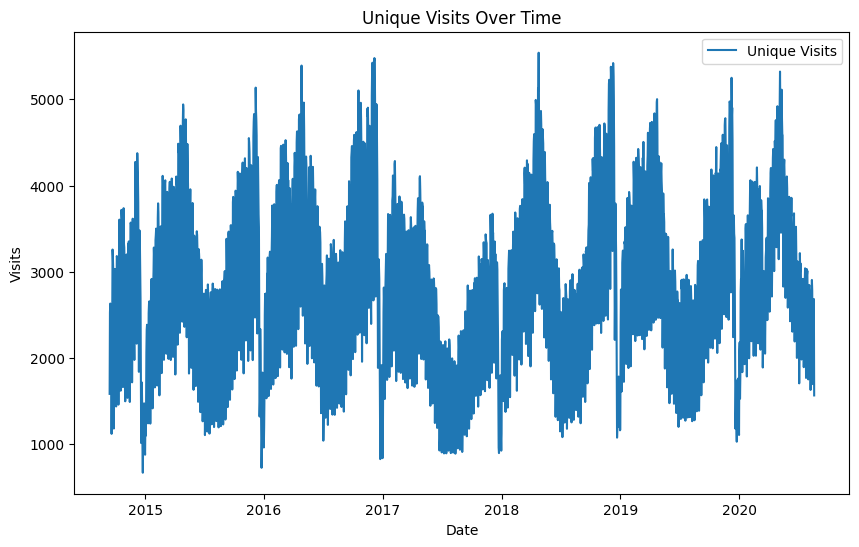

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df['Unique.Visits'], label='Unique Visits')
plt.title('Unique Visits Over Time')
plt.xlabel('Date')
plt.ylabel('Visits')
plt.legend()
plt.show()

# Using Seasonal Decompose to see Trend, Seasonality and Noise (Residuals) separately

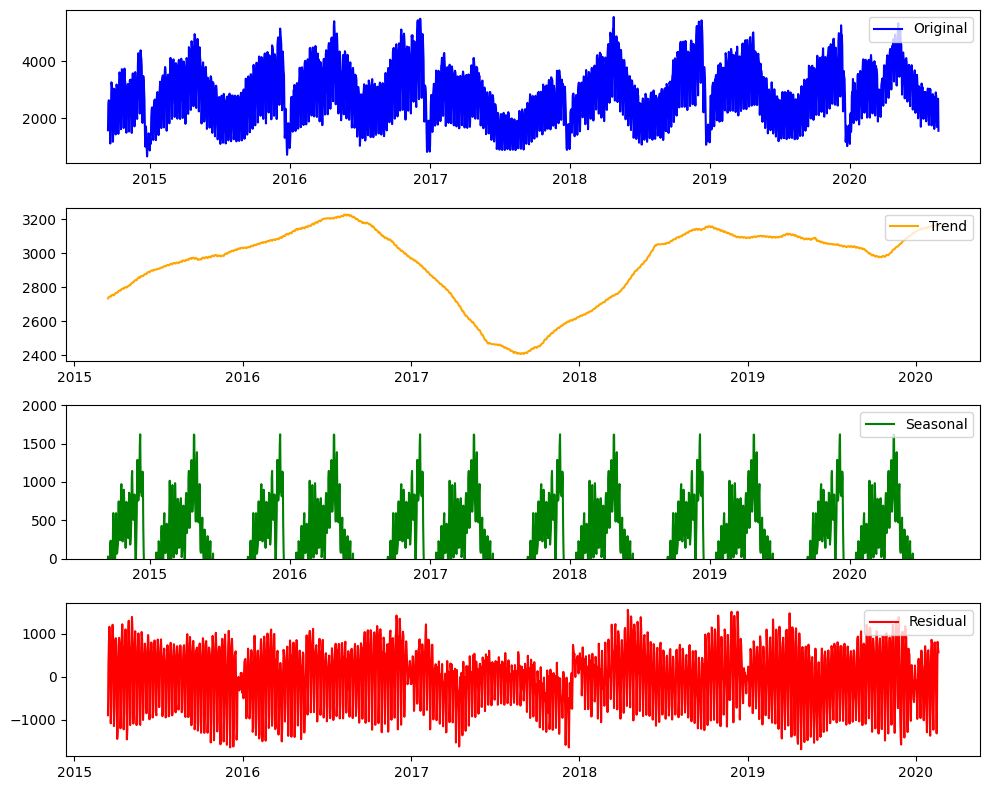

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Converting 'Unique.Visits' to numeric by removing commas and converting to float
df['Unique.Visits'] = df['Unique.Visits'].replace(',', '', regex=True).astype(float)

# Decomposing the time series
decomposition = seasonal_decompose(df['Unique.Visits'], model='additive', period=365)

# Extracting the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting each component separately
plt.figure(figsize=(10, 8))

# Original series
plt.subplot(4, 1, 1)
plt.plot(df['Unique.Visits'], label='Original', color='blue')
plt.legend(loc='upper right')

# Trend
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='upper right')

# Seasonal (with adjusted y-axis)
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal', color='green')
plt.ylim(0, 2000)  # Setting y-axis range for seasonal component
plt.legend(loc='upper right')

# Residual
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual', color='red')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Visualizing Rolling Mean and Standard deviation 

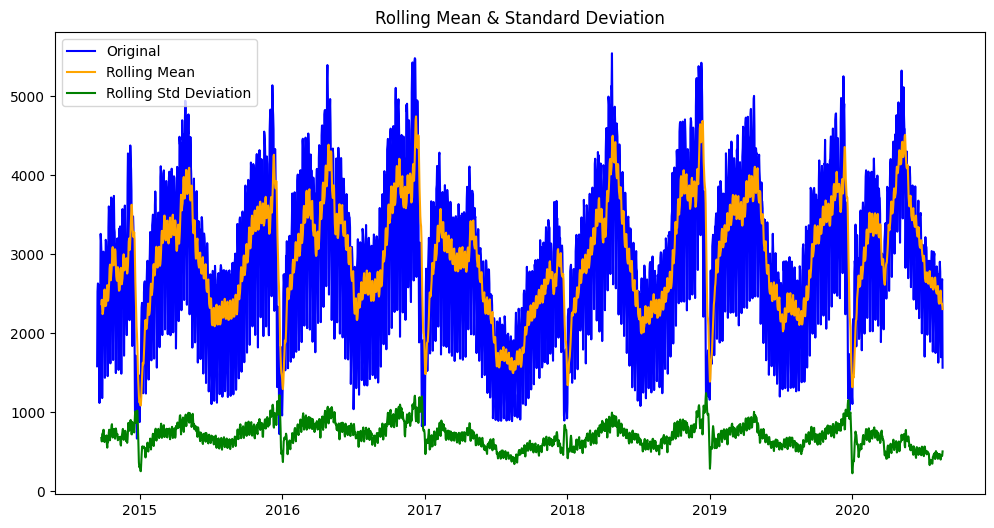

In [11]:
import matplotlib.pyplot as plt

# Calculating rolling statistics
rolling_mean = df['Unique.Visits'].rolling(window=12).mean()
rolling_std = df['Unique.Visits'].rolling(window=12).std()

# Plotting original series, rolling mean, and rolling std
plt.figure(figsize=(12, 6))
plt.plot(df['Unique.Visits'], color='blue', label='Original')
plt.plot(rolling_mean, color='orange', label='Rolling Mean')
plt.plot(rolling_std, color='green', label='Rolling Std Deviation')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

# Checking for stationarity using Augmented Dickey Fuller Test

In [12]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller


# Extracting the column you want to check for stationarity, e.g., 'unique_visits'
ts = df['Unique.Visits']

# Performing the Augmented Dickey-Fuller test
adf_test = adfuller(ts)

# Extracting and print the results
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])
print("Critical Values:")
for key, value in adf_test[4].items():
    print(f"\t{key}: {value}")

# Interpreting the results
if adf_test[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

ADF Statistic: -4.475968574445406
p-value: 0.0002172640930008002
Critical Values:
	1%: -3.4334094211542983
	5%: -2.8628915360971003
	10%: -2.5674894918770197
The time series is stationary.


# Plotting Autocorrelation and Partial Autocorrelation

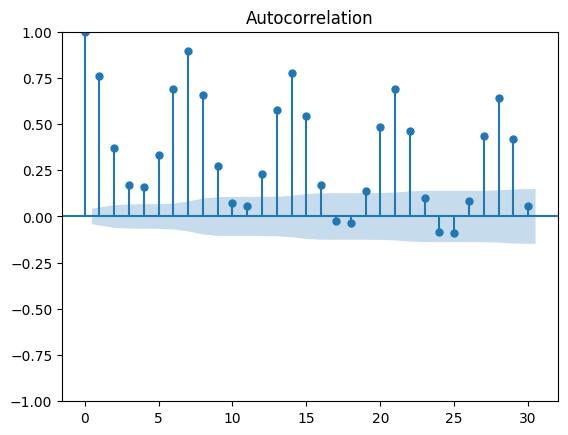

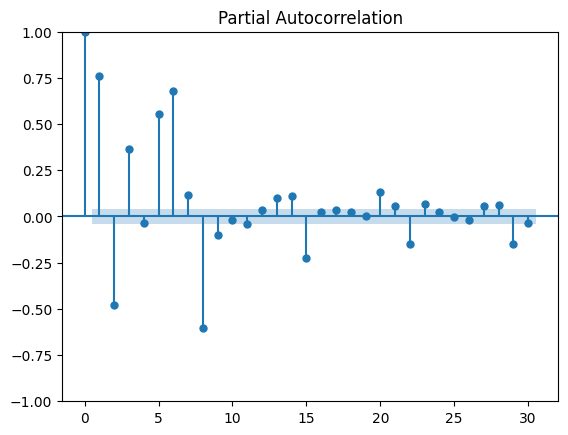

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting ACF and PACF
plot_acf(df['Unique.Visits'].dropna(), lags=30)
plot_pacf(df['Unique.Visits'].dropna(), lags=30)
plt.show()

# Preprocessing and fitting the time series in ARIMA Model

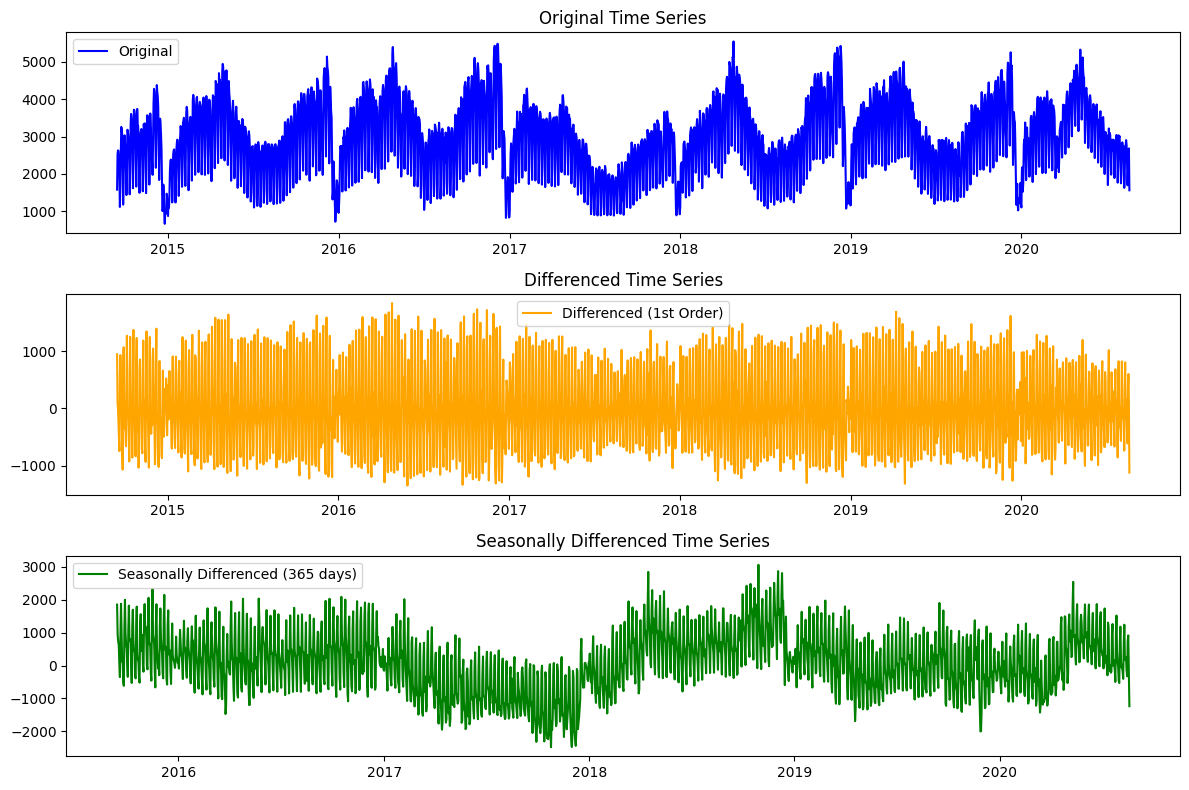

C:\Users\91957\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\91957\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\91957\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


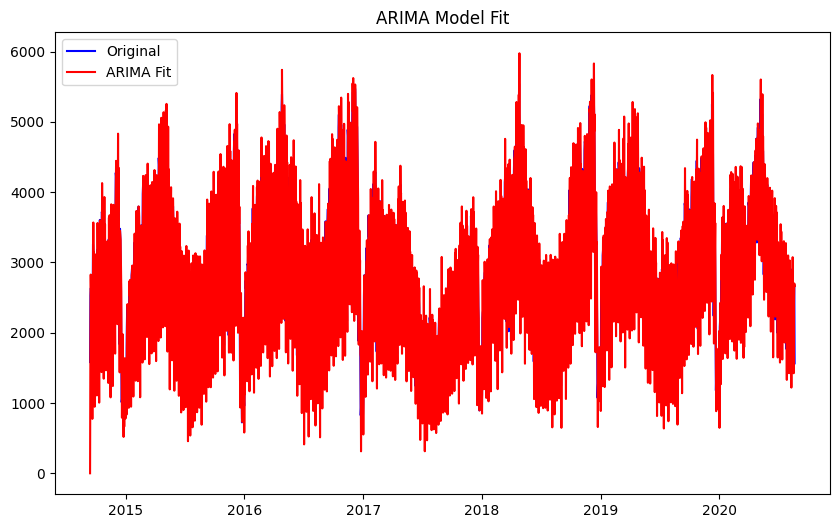

ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:          Unique.Visits   No. Observations:                 2167
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -16845.313
Date:                Sun, 22 Dec 2024   AIC                          33696.626
Time:                        20:21:27   BIC                          33713.668
Sample:                    09-14-2014   HQIC                         33702.858
                         - 08-19-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1297      0.032     -4.005      0.000      -0.193      -0.066
ma.L1          0.7451      0.023     31.769      0.000       0.699       0.791
sigma2      3.332e+05   1.33e+0

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Original time series
ts = df['Unique.Visits']

# 1. Differencing
diff_ts = ts.diff().dropna()

# 2. Seasonal Differencing (with a period of 365 for yearly seasonality)
seasonal_diff_ts = ts.diff(365).dropna()

# Plotting the original, differenced, and seasonal differenced time series
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(ts, label='Original', color='blue')
plt.title('Original Time Series')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(diff_ts, label='Differenced (1st Order)', color='orange')
plt.title('Differenced Time Series')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(seasonal_diff_ts, label='Seasonally Differenced (365 days)', color='green')
plt.title('Seasonally Differenced Time Series')
plt.legend()

plt.tight_layout()
plt.show()

# 3. Fitting ARIMA Model
arima_model = ARIMA(ts, order=(1, 1, 1))  # (p, d, q) - Adjust as needed
arima_result = arima_model.fit()

# Plotting ARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Original', color='blue')
plt.plot(arima_result.fittedvalues, label='ARIMA Fit', color='red')
plt.title('ARIMA Model Fit')
plt.legend()
plt.show()

print("ARIMA Model Summary:")
print(arima_result.summary())

# ARIMA Model forecast upto 2022

C:\Users\91957\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


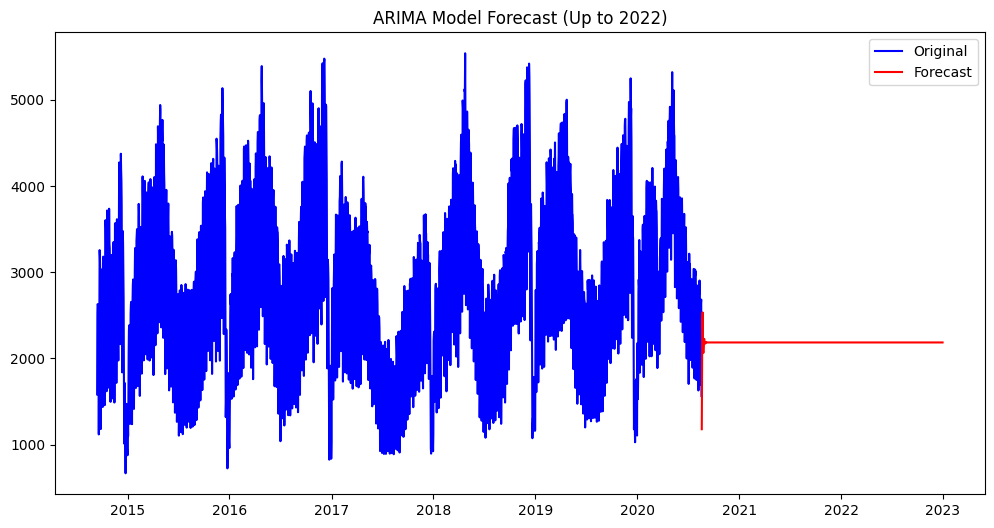

In [15]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


# Explicitly setting the frequency of the DateTime index
df = df.asfreq('D')  # 'D' for daily frequency

# Defining the ARIMA model using the specified p, d, q values from your results
p = 2  # AR order
d = 1  # Differencing order
q = 2  # MA order

model = ARIMA(df['Unique.Visits'], order=(p, d, q))
fitted_model = model.fit()

# Calculating the number of days to forecast until the end of 2022
forecast_end_date = pd.Timestamp("2022-12-31")
forecast_steps = (forecast_end_date - df.index[-1]).days

# Forecasting for the calculated number of days
forecast = fitted_model.get_forecast(steps=forecast_steps)

# Generating a new DateTime index for the forecast period
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Plotting the original series and the forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Unique.Visits'], label='Original', color='blue')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
plt.title("ARIMA Model Forecast (Up to 2022)")
plt.legend(loc='upper right')
plt.show()

# Fitting generated SARIMA model with original data to see the fit

C:\Users\91957\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\91957\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\91957\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\optimizer.py:737: RuntimeWarning: Maximum number of iterations has been exceeded.
  retvals = optimize.fmin(f, start_params, args=fargs, xtol=xtol,
C:\Users\91957\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


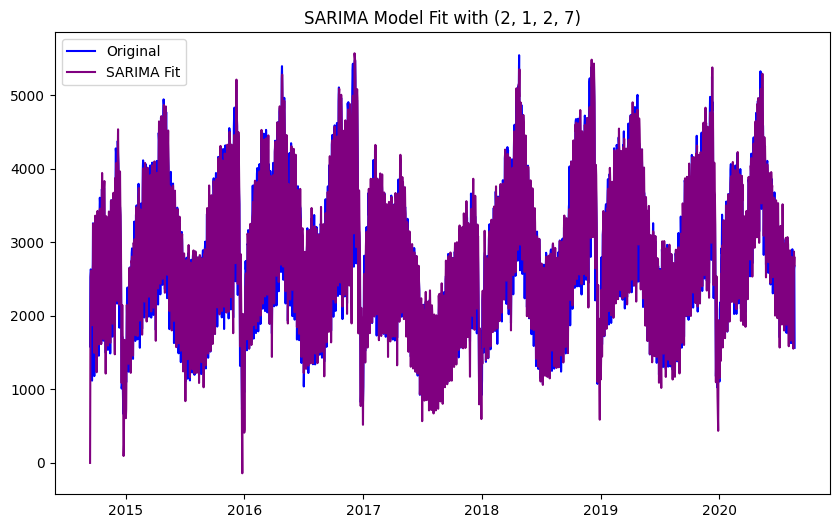

SARIMA Model Summary:
                                     SARIMAX Results                                     
Dep. Variable:                     Unique.Visits   No. Observations:                 2167
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 7)   Log Likelihood              -14739.646
Date:                           Sun, 22 Dec 2024   AIC                          29497.292
Time:                                   20:21:39   BIC                          29548.388
Sample:                               09-14-2014   HQIC                         29515.981
                                    - 08-19-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4402      0.111      3.952      0.000       0.222       0.659
ar.L2         -0.0810

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Defining the SARIMA model
sarima_model = SARIMAX(ts, order=(2, 1, 2), seasonal_order=(2, 1, 2, 7))

# Fitting the SARIMA model
sarima_result = sarima_model.fit(method='nm', maxiter=500)

# Plot the SARIMA model fit
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Original', color='blue')
plt.plot(sarima_result.fittedvalues, label='SARIMA Fit', color='purple')
plt.title('SARIMA Model Fit with (2, 1, 2, 7)')
plt.legend()
plt.show()

# Printing SARIMA model summary
print("SARIMA Model Summary:")
print(sarima_result.summary())

# Residuals for SARIMA model

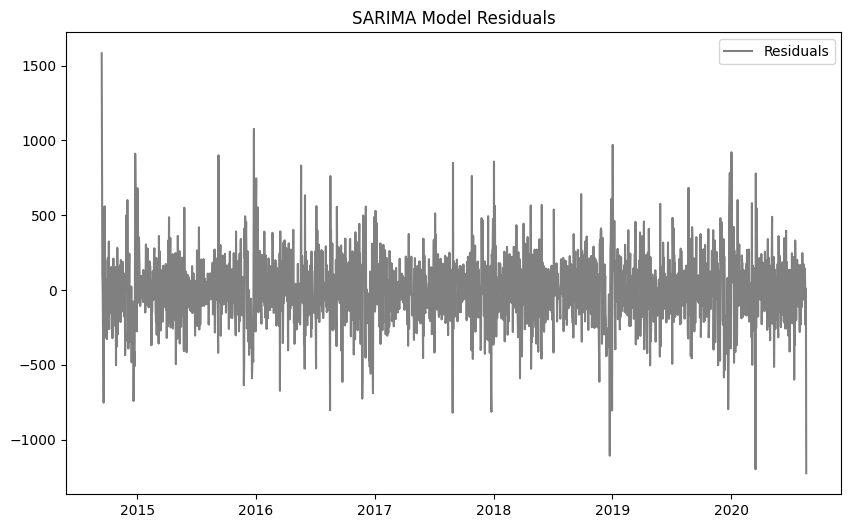

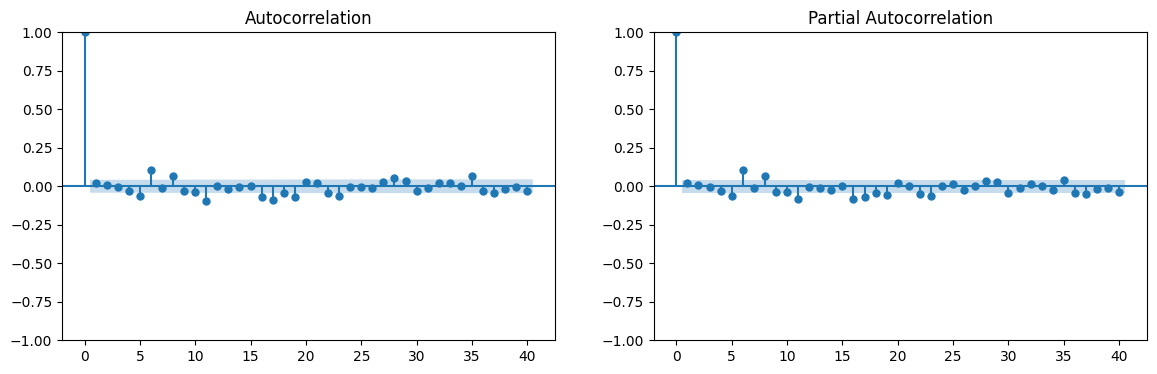

In [17]:
import statsmodels.api as sm

# Plotting residuals
residuals = sarima_result.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='gray')
plt.title('SARIMA Model Residuals')
plt.legend()
plt.show()

# Plotting ACF and PACF of residuals
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(residuals, lags=40, ax=ax[1])
plt.show()

# Q-Q Plot of SARIMA model

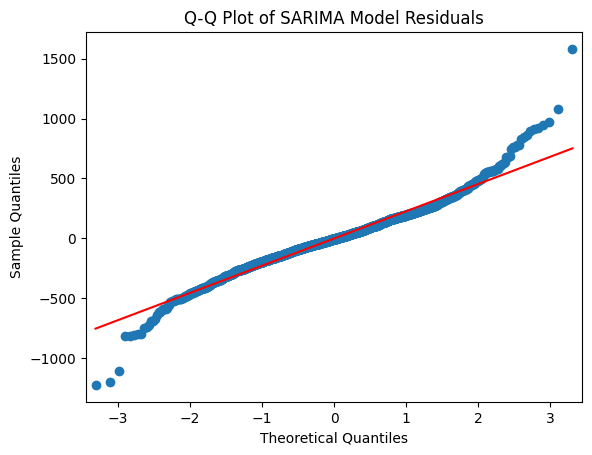

In [18]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Extracting the residuals from the SARIMA model
residuals = sarima_result.resid

# Generating a Q-Q plot
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of SARIMA Model Residuals')
plt.show()

# Histogram of SARIMA Model Residuals

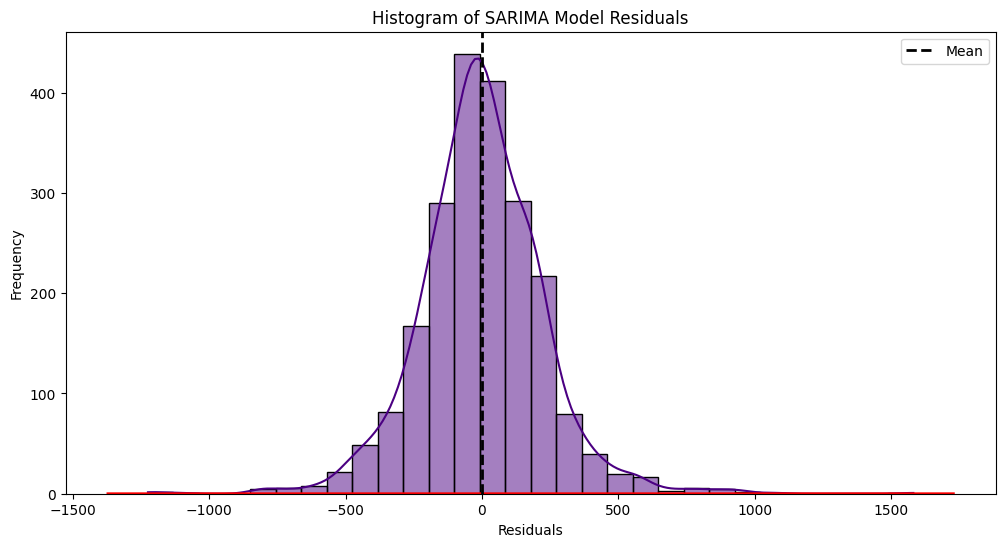

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Extracting the residuals from the SARIMA model
residuals = sarima_result.resid

# Calculating the mean of the residuals
mean_residual = np.mean(residuals)

# Plotting the histogram
plt.figure(figsize=(12, 6))
sns.histplot(residuals, bins=30, kde=True, color='indigo', edgecolor='black')
sns.kdeplot(residuals, color='red', linewidth=2)
plt.axvline(mean_residual, color='black', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Histogram of SARIMA Model Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# SARIMA Model Prediction and Immidiate forecast

C:\Users\91957\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA Model Summary:
                                     SARIMAX Results                                     
Dep. Variable:                     Unique.Visits   No. Observations:                 2167
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 7)   Log Likelihood              -14671.510
Date:                           Sun, 22 Dec 2024   AIC                          29361.021
Time:                                   20:21:52   BIC                          29412.046
Sample:                               09-14-2014   HQIC                         29379.691
                                    - 08-19-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9806      0.124      7.876      0.000       0.737       1.225
ar.L2         -0.5337

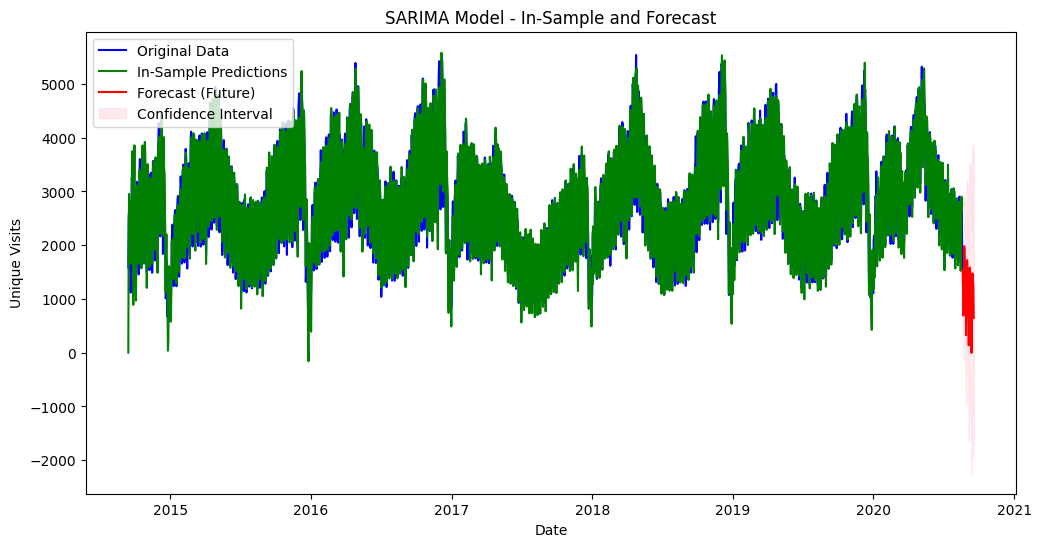

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Defining SARIMA parameters
p, d, q = 2, 1, 2  # Non-seasonal parameters
P, D, Q, m = 2, 1, 2, 7  # Seasonal parameters with weekly seasonality

# Fitting the SARIMA model
sarima_model = SARIMAX(
    df['Unique.Visits'],
    order=(p, d, q),
    seasonal_order=(P, D, Q, m),
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarima_result = sarima_model.fit()

# Printing the model summary
print("SARIMA Model Summary:")
print(sarima_result.summary())

# Generating in-sample predictions (for the original data)
in_sample_predictions = sarima_result.fittedvalues

# Forecasting future values
forecast_steps = 30  # Number of days to forecast
forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Generating index for the forecast period
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Plotting the original data, in-sample predictions, and forecast
plt.figure(figsize=(12, 6))

# Plotting original data
plt.plot(df.index, df['Unique.Visits'], label='Original Data', color='blue')

# Plotting in-sample predictions
plt.plot(df.index, in_sample_predictions, label='In-Sample Predictions', color='green')

# Plotting forecasted values
plt.plot(forecast_index, forecast_values, label='Forecast (Future)', color='red')

# Plotting confidence intervals
plt.fill_between(
    forecast_index,
    confidence_intervals.iloc[:, 0],
    confidence_intervals.iloc[:, 1],
    color='pink',
    alpha=0.3,
    label='Confidence Interval'
)

plt.title("SARIMA Model - In-Sample and Forecast")
plt.xlabel("Date")
plt.ylabel("Unique Visits")
plt.legend(loc='upper left')
plt.show()

# SARIMA Model Predictions and Future Forecast

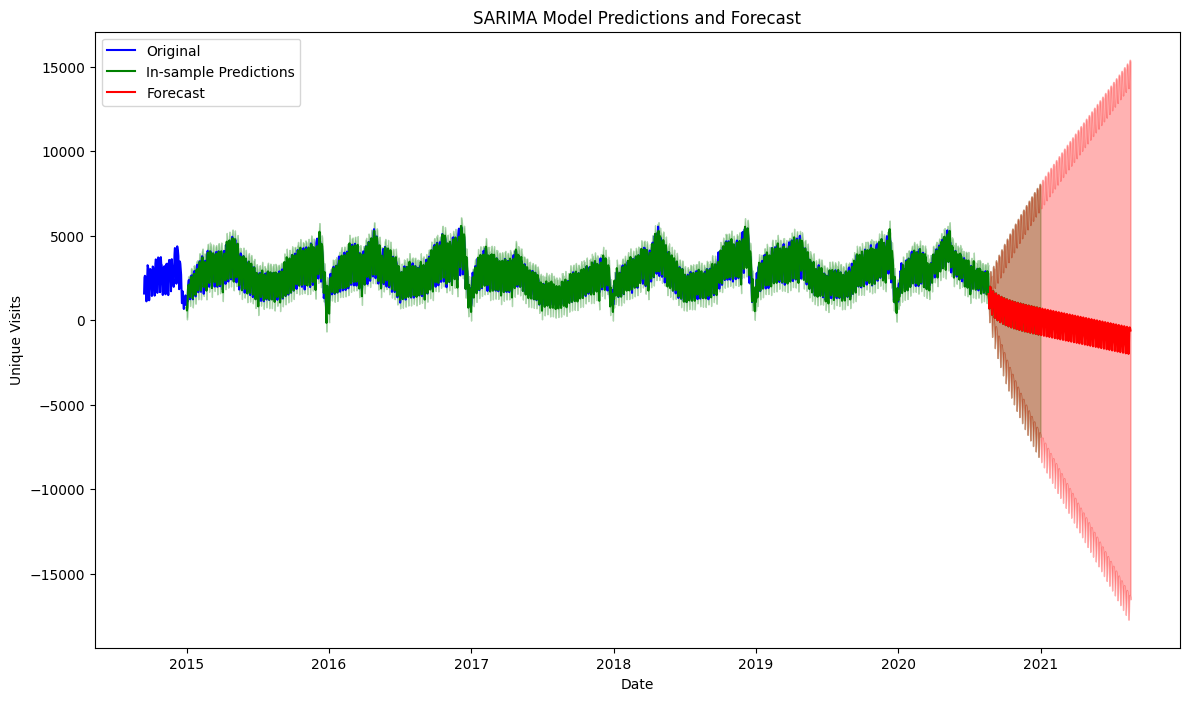

In [21]:
import matplotlib.pyplot as plt

# Generating in-sample predictions (for the existing data range)
in_sample_predictions = sarima_result.get_prediction(start=pd.to_datetime('2015-01-01'), end=pd.to_datetime('2020-12-31'))
in_sample_conf_int = in_sample_predictions.conf_int()

# Generating out-of-sample forecasts (for future data points)
forecast_steps = 365  # Number of days to forecast
future_forecast = sarima_result.get_forecast(steps=forecast_steps)
future_conf_int = future_forecast.conf_int()

# Plotting the results
plt.figure(figsize=(14, 8))

# Plotting the original series
plt.plot(ts, label='Original', color='blue')

# Plotting in-sample predictions
plt.plot(in_sample_predictions.predicted_mean, label='In-sample Predictions', color='green')
plt.fill_between(in_sample_conf_int.index,
                 in_sample_conf_int.iloc[:, 0],
                 in_sample_conf_int.iloc[:, 1], color='green', alpha=0.3)

# Plotting out-of-sample forecasts
plt.plot(future_forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(future_conf_int.index,
                 future_conf_int.iloc[:, 0],
                 future_conf_int.iloc[:, 1], color='red', alpha=0.3)
plt.title('SARIMA Model Predictions and Forecast')
plt.xlabel('Date')
plt.ylabel('Unique Visits')
plt.legend()
plt.show()